# Third-party ads

In [1]:
library(ggplot2)
library(scales)

theme_set(theme_bw())

load('../data/third_party_ads.Rdata')

# Helper function to make labels pretty
getPrettyLdaTopicLabel <- function (topic) {
  pretty.topic <- sub('pub_games', 'Gaming', topic)
  pretty.topic <- sub('general', 'miscellaneous', pretty.topic)
  pretty.topic <- sub('(pub|ref|web-services|offline)_', '', pretty.topic)
  pretty.topic <- sub('_', ' ', pretty.topic)
  pretty.topic <- sub('peoplesearch', 'people search', pretty.topic)
  pretty.topic <- sub('porn', 'Pornography', pretty.topic)
  pretty.topic <- sub('gov', 'Government', pretty.topic)
  pretty.topic <- sub('entertainment tv', 'entertainment/TV', pretty.topic)
  pretty.topic <- gsub('entertainment (\\w)', 'entertainment/\\U\\1',
                       pretty.topic, perl=TRUE)
  pretty.topic <- gsub('gambling (\\w)', 'gambling/\\U\\1', pretty.topic,
                       perl=TRUE)
  pretty.topic <- gsub('^(\\w)', '\\U\\1', pretty.topic, perl=TRUE)
  pretty.topic
}

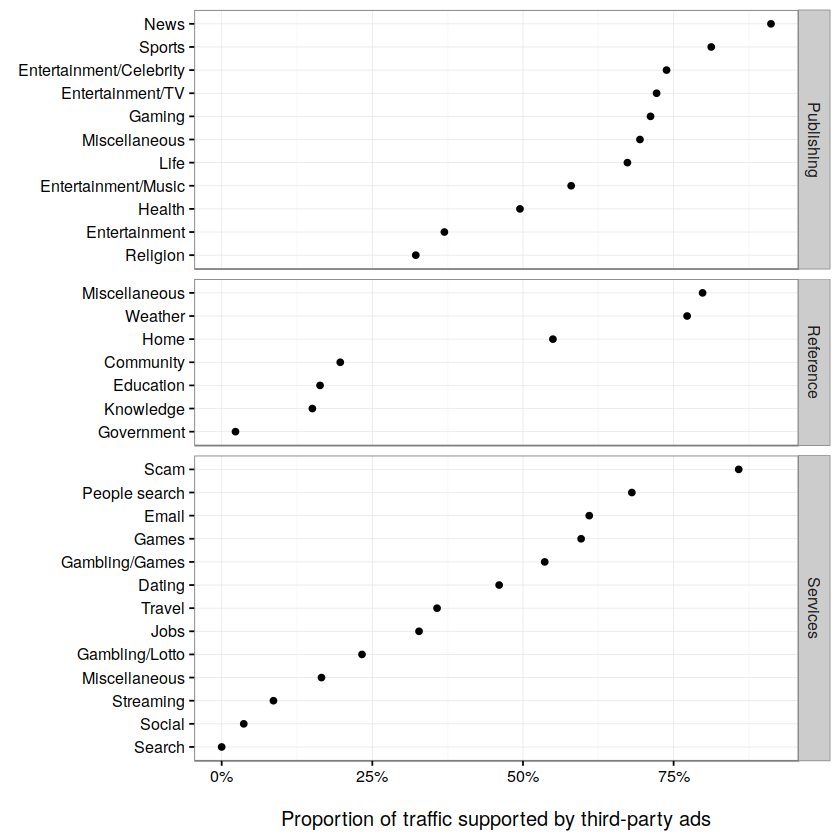

In [2]:
p <- ggplot(third_party_ads, aes(y=topic, x=pct_susceptible)) + 
  facet_grid(high_level_topic ~ ., space='free', scales='free', drop=TRUE) +
  geom_point() + 
  scale_y_discrete(element_blank(), labels=getPrettyLdaTopicLabel) +
  scale_x_continuous('\nProportion of traffic supported by third-party ads',
                     label=percent)
p

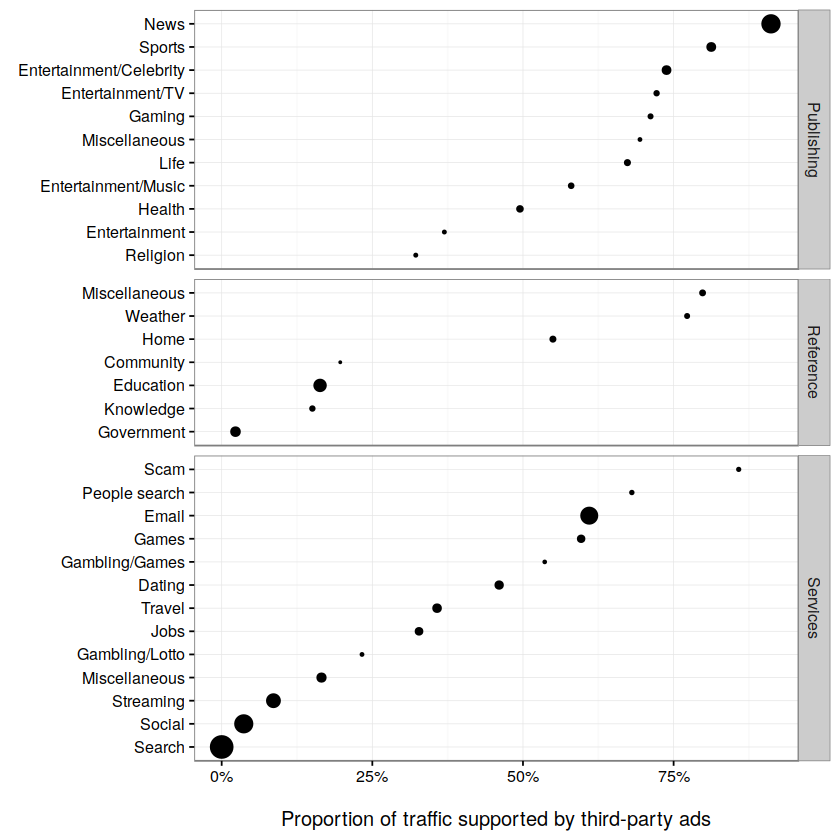

In [3]:
p <- ggplot(third_party_ads, 
            aes(y=topic, x=pct_susceptible, size=topic_pageviews)) + 
  facet_grid(high_level_topic ~ ., space='free', scales='free', drop=TRUE) +
  geom_point() + 
  scale_y_discrete(element_blank(), labels=getPrettyLdaTopicLabel) +
  scale_x_continuous('\nProportion of traffic supported by third-party ads',
                     label=percent) +
  scale_size_area(guide=FALSE, breaks=c(1e8, 2.5e8, 5e8, 1e9, 2e9),  
                  labels=c('100m', '250m', '500m', '1bn', '2bn'))
p

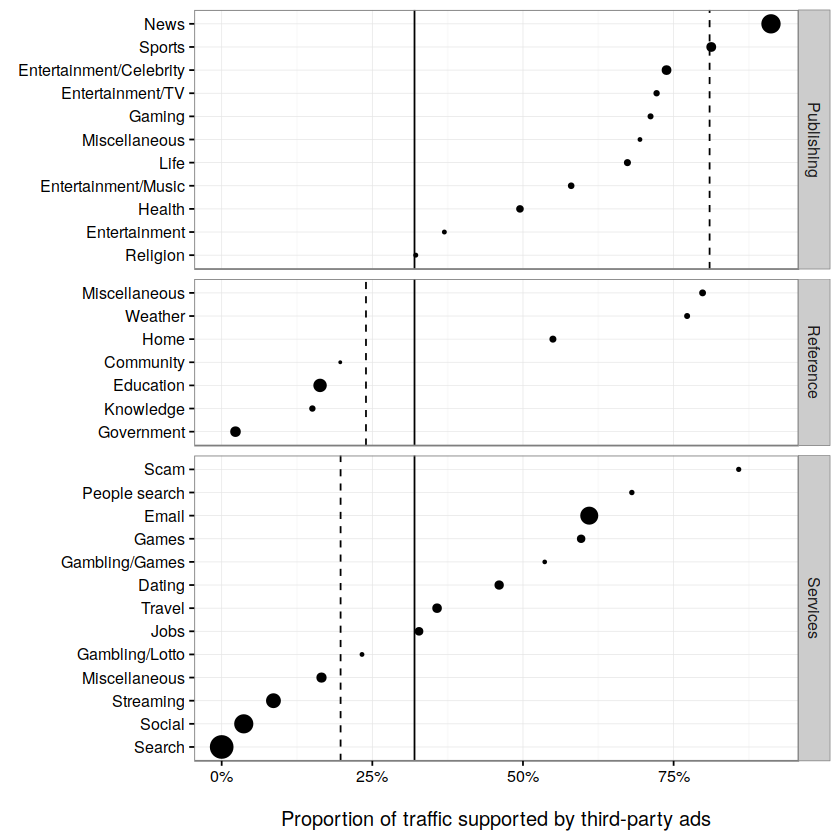

In [4]:
# Additional value to plot 
# Usually this would be computed from some data; it is presented here as a 
# hard-coded value for illustrative purposes
non_commerce_susceptibility_overall_pct <- 0.32

p <- ggplot(third_party_ads, 
            aes(y=topic, x=pct_susceptible, size=topic_pageviews)) + 
  facet_grid(high_level_topic ~ ., space='free', scales='free', drop=TRUE) +
  geom_point() + 
  scale_y_discrete(element_blank(), labels=getPrettyLdaTopicLabel) +
  scale_x_continuous('\nProportion of traffic supported by third-party ads',
                     label=percent) +
  scale_size_area(guide=FALSE, breaks=c(1e8, 2.5e8, 5e8, 1e9, 2e9),  
                  labels=c('100m', '250m', '500m', '1bn', '2bn')) + 
  geom_vline(aes(xintercept=pct_susceptible_high), linetype='dashed') +
  geom_vline(aes(xintercept=non_commerce_susceptibility_overall_pct),  
             linetype='solid')
p